In [2]:
"""
works after:
 1. pipx runpip eth-ape install notebook matplotlib
 2. ape console
 3. In [1]: from notebook import notebookapp as app
    In [2]: app.launch_new_instance()

NOTE: for some reason `ape-notebook` plugin not displaying in cli when run `ape -h`, so needed to
      pipx runpip install notebook into my ape package env. Then run `ape-notebook` one line src from
      `ape console`.

TODO: figure out why ape-notebook plugin not working for me.
"""
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [5]:
# get the balance of account 0
dev.balance

0

In [6]:
current_block = chain.blocks[-1].number
current_block

15453880

In [7]:
dblocks = int(86400*90/12) # last 90 d
start_block = current_block - dblocks
start_block

14805880

In [8]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [9]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [10]:
steth.balanceOf(curve_steth)

575645732432343397833885

In [11]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [12]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [13]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

INFO: Cache database has not been initialized
CPU times: user 298 ms, sys: 37 ms, total: 335 ms
Wall time: 1.98 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...,0x9d4bb587f534abf5e77cb95c76c1fb13ce6ab877ecf9...,15450927,0x206f05a6f95ed5051e0ce6a7902dfa2f91af95f49421...,498,232
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...,0x7c99cd9810b1fb51ce0131154b69417d76b31c86e115...,15450946,0xfbf37b47706ad7d4d707567a4a15537d69e62ff51e32...,203,98
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x5604049369caddd71c0a039ba1a23efe234340b4354b...,15451001,0xdee58292ceffd44f10764d429486449a17d672d9fcb2...,89,84
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xC869D1e7132290280cA0b4f58Ba711a1b...,0x3d0b9cc596ec50b2e75b74ceae4a96d319368c034829...,15451066,0xc1299cad6834767c9d9a9aefdd1bfa41010871d4f630...,428,203
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x60b59e663b2cb6de26582e2e64b8cdabdb694293c1bc...,15451131,0xfc4dea708731daa341260cecd9b3f09ad5e8cf290b45...,64,123
5,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xafd8e2187e0e5dd8389e734f290ed7f0c2a7013566d2...,15451144,0x0ed4e61d1dbabba11656f87cc03dcd3fa6ea3f7a5c53...,516,96
6,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xa99Ad2247e2b5EEC38fEF05A313829ffE...,0xae77d47f9b168d060abd91c2c176a0276a705553fea8...,15451169,0x2ffff1bf2565027f4b6725e801596f93eab810889e09...,161,29
7,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xd5173d9B5f49364E0eacc10FDae460458...,0xad71ac3cd810d9967b983dbcce8554656a232188e66b...,15451193,0x6d76aabcfb35132bf8223b1f07e41577273c6c2e4b99...,130,57
8,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x91000060399502550000007bbfBA0052F...,0x4c24f7337b0e6973e7f9aa16d294cfc6b2356d959344...,15451580,0xcc6802ee0734ac7570cd2c7172ba2e6ad09734cec70a...,92,12
9,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x332e97d3bfb7c5bfbc86764cae823f0f4d567e7c19af...,15451663,0x65c1e84e8ec4c6ade169cd9bb4b7c66152d76cefd330...,54,31


In [14]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [15]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...
1    {'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...
2    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
3    {'buyer': '0xC869D1e7132290280cA0b4f58Ba711a1b...
4    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
5    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
6    {'buyer': '0xa99Ad2247e2b5EEC38fEF05A313829ffE...
7    {'buyer': '0xd5173d9B5f49364E0eacc10FDae460458...
8    {'buyer': '0x91000060399502550000007bbfBA0052F...
9    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
Name: event_arguments, dtype: object

In [16]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [17]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57',
 'sold_id': 0,
 'tokens_sold': 9646274524642794708,
 'bought_id': 1,
 'tokens_bought': 9927491091346153686}

In [18]:
# ok great. let's look a bit further into the past to start_block from above. see how long it takes
%time query_swaps_original = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps_original

CPU times: user 37 s, sys: 5.41 s, total: 42.4 s
Wall time: 3min 22s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xaca594c7fdb9f87a32c83fc3aa4b1fffed8056a20d80...,14805946,0x757273111a679c3ad248424d5a1586244d9ec8baf940...,197,76
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xb82e4069e45e61b1de2c754cacf1ab1ccc40b17ce950...,14805949,0xb58382ff1bf4cdadce1fc8297f7a98b71ca97d66e457...,246,182
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x982cc2acdb911583fbc1a02c76228da58c3eb1899cfa...,14805966,0xc0744a04ee029e9547641e928179c01c9144ce991b4c...,156,146
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xd02f4997b32c7d79d070ddb521505b66caf7188824f8...,14806016,0x724910de73edf4382516fd0573615bbdeb84b8a4f5a8...,215,189
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0c43A4a20D2751DaFbB130024355E81df...,0x6ad094d8e7ec75a03f4be1d6a68f5552d10f20e32b66...,14806057,0x5901063081873abec82682c0da7823e576e2a001436f...,242,196
...,...,...,...,...,...,...,...,...
19452,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271
19453,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A4...,0x1e5b61c1729e0998258f6f2cd6fb3eca1ce581690ec8...,15453320,0xdf0872c92915dc8582bb38cad33a70c94e0b52449e1b...,243,258
19454,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x684Ea7317b8692fBc3ba5DF5F8F7cceA0...,0xd2ad62baafc358d84bf98d552ae321a639a4f86caeff...,15453534,0x95ce49f01fbf1ced4431f398143e1e60d6289a758234...,225,153
19455,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5ea10cbf5f3583cf74cf2c3e06abe1d3e00f36e5ff32...,15453542,0x43964925c65e7a56f2d41ced6e1acda7dbc2b9394efa...,421,357


In [19]:
query_swaps = query_swaps_original.copy()

In [20]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [21]:
steth.address == coin_indices[-1]

True

In [22]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [23]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57', 'sold_id': 0, 'tokens_sold': 9646274524642794708, 'bought_id': 1, 'tokens_bought': 9927491091346153686}
price: 0.9712844331862555


In [24]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [25]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [26]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xaca594c7fdb9f87a32c83fc3aa4b1fffed8056a20d80...,14805946,0x757273111a679c3ad248424d5a1586244d9ec8baf940...,197,76,0.983072
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xb82e4069e45e61b1de2c754cacf1ab1ccc40b17ce950...,14805949,0xb58382ff1bf4cdadce1fc8297f7a98b71ca97d66e457...,246,182,0.983020
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x982cc2acdb911583fbc1a02c76228da58c3eb1899cfa...,14805966,0xc0744a04ee029e9547641e928179c01c9144ce991b4c...,156,146,0.983020
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xd02f4997b32c7d79d070ddb521505b66caf7188824f8...,14806016,0x724910de73edf4382516fd0573615bbdeb84b8a4f5a8...,215,189,0.983021
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0c43A4a20D2751DaFbB130024355E81df...,0x6ad094d8e7ec75a03f4be1d6a68f5552d10f20e32b66...,14806057,0x5901063081873abec82682c0da7823e576e2a001436f...,242,196,0.983021
...,...,...,...,...,...,...,...,...,...
19452,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294
19453,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A4...,0x1e5b61c1729e0998258f6f2cd6fb3eca1ce581690ec8...,15453320,0xdf0872c92915dc8582bb38cad33a70c94e0b52449e1b...,243,258,0.971288
19454,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x684Ea7317b8692fBc3ba5DF5F8F7cceA0...,0xd2ad62baafc358d84bf98d552ae321a639a4f86caeff...,15453534,0x95ce49f01fbf1ced4431f398143e1e60d6289a758234...,225,153,0.971282
19455,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5ea10cbf5f3583cf74cf2c3e06abe1d3e00f36e5ff32...,15453542,0x43964925c65e7a56f2d41ced6e1acda7dbc2b9394efa...,421,357,0.971282


<AxesSubplot:xlabel='block_number'>

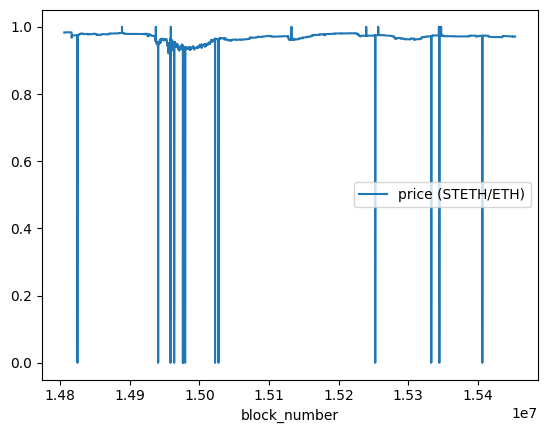

In [27]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

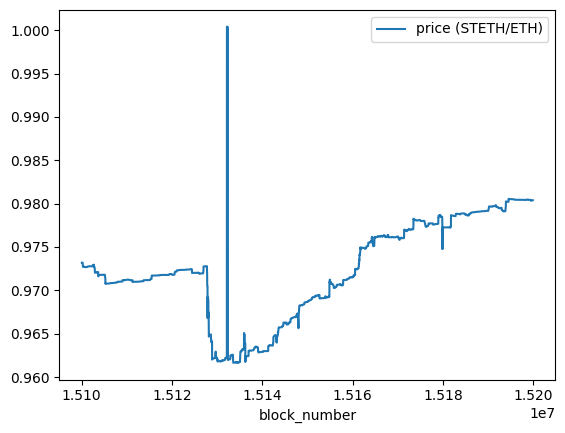

In [28]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

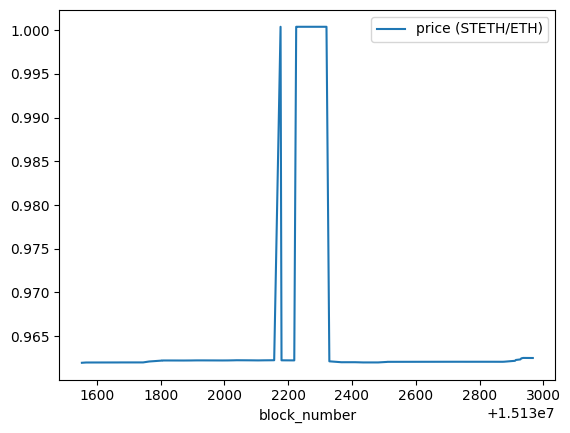

In [29]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [30]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict) -> tp.Any:
    return event_args[key]

for key in query_swaps.iloc[-1]['event_arguments'].keys():
    query_swaps[key] = query_swaps['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [31]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xaca594c7fdb9f87a32c83fc3aa4b1fffed8056a20d80...,14805946,0x757273111a679c3ad248424d5a1586244d9ec8baf940...,197,76,0.983072,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,700000000000000000000,0,687875178355535745964
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xb82e4069e45e61b1de2c754cacf1ab1ccc40b17ce950...,14805949,0xb58382ff1bf4cdadce1fc8297f7a98b71ca97d66e457...,246,182,0.983020,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,10000000000000000000,0,9826273826382007791
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x982cc2acdb911583fbc1a02c76228da58c3eb1899cfa...,14805966,0xc0744a04ee029e9547641e928179c01c9144ce991b4c...,156,146,0.983020,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,614070000000000000,0,603401523819156548
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xd02f4997b32c7d79d070ddb521505b66caf7188824f8...,14806016,0x724910de73edf4382516fd0573615bbdeb84b8a4f5a8...,215,189,0.983021,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,4350000000000000000,0,4274431391401509923
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0c43A4a20D2751DaFbB130024355E81df...,0x6ad094d8e7ec75a03f4be1d6a68f5552d10f20e32b66...,14806057,0x5901063081873abec82682c0da7823e576e2a001436f...,242,196,0.983021,0x0c43A4a20D2751DaFbB130024355E81dff724d3a,1,2661716510582147106,0,2615477797984023549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,4271237846165710434,0,4146970008556619586
19453,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A4...,0x1e5b61c1729e0998258f6f2cd6fb3eca1ce581690ec8...,15453320,0xdf0872c92915dc8582bb38cad33a70c94e0b52449e1b...,243,258,0.971288,0xFEf3C7aa6956D03dbad8959c59155c4A465DCacd,1,38000000000000000000,0,36894174538661211189
19454,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x684Ea7317b8692fBc3ba5DF5F8F7cceA0...,0xd2ad62baafc358d84bf98d552ae321a639a4f86caeff...,15453534,0x95ce49f01fbf1ced4431f398143e1e60d6289a758234...,225,153,0.971282,0x684Ea7317b8692fBc3ba5DF5F8F7cceA0608FeAf,1,433557667605135699,0,420938260856818595
19455,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5ea10cbf5f3583cf74cf2c3e06abe1d3e00f36e5ff32...,15453542,0x43964925c65e7a56f2d41ced6e1acda7dbc2b9394efa...,421,357,0.971282,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,0,2900000000000000000,1,2984549486416737551


In [32]:
# now, check swaps where price spikes up to 1 between blocks 15132100 and 15132400
query_swaps[(query_swaps['block_number'] > 15132100) & (query_swaps['block_number'] < 15132400)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
11331,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xbaafb0dd80a49933313f5fae987331002fddd66ce398...,15132106,0x3f0dafa8c0bc1f75da4b77185df4b5e72f82367ce714...,6,1,0.962210,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,9999999999999999,0,9618254969587698
11332,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x38ecea57eecc869cc4a62d96555f15ffe3136f32e06d...,15132124,0x97431fe5b1b89ff7dd6dd8c340ca44707052bbdf729f...,291,123,0.962220,0xfA9a30350048B2BF66865ee20363067c66f67e58,0,33697027127765331114,1,35006090866436268938
11333,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xed21e5dc1f4099e247b0e815eb3874a7ff1d837d3a8e...,15132156,0x369ef5481d51a5d35c3e5fa176283314cdd284d829eb...,73,46,0.962230,0x0031130c56162e00A7e9C01eE4147b11cbac8776,0,2461328000000000000,1,2556919375120216623
11334,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x7438e5f555766a7f549d93c98022e0c6484729fa8d9f...,15132176,0x7905d8a7692da709cb1f9deaed58d35b3e29fa956fae...,34,10,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11335,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x722c4b153c4e33f1f5cbd0819d4847851d588d08184a...,15132179,0x8ec15d94c325e9e9552dc7f2c48e20f982ff5e694b3f...,40,24,0.962221,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,35006090866436268938,0,33670122355004768780
11336,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x93Fa84f3102d45fC8e0721143c05b2c15...,0x510b3876226e4bc81ae5afeedc3754dffcd5842bbe1d...,15132219,0x57d3a5987fce344172cc3549db379419aff5745c1ccc...,323,144,0.962212,0x93Fa84f3102d45fC8e0721143c05b2c156026025,0,1300000000000000000,1,1350513053366563254
11337,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x56804547a6d74ac0152564a250aff84cea33b85ed53f...,15132225,0xc766211f83c2421824f805fd98f43bca867a03c63947...,62,8,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11338,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x3356a73accd1729384e364750411036472c2b9ff5327...,15132229,0x368ab30333621f418f1f6634d737d72adb2f77421518...,58,12,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11339,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xd6978029b6bb52e8b4ffae55ce8f5a2de8b652ef0a1f...,15132280,0xd3893a3097aadadfa9fea3fadad6f7bdd48c54c03f80...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11340,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x93751a459ccb0838f4cfe07960e6afff4eeaf33facbe...,15132283,0x74c38343de39bd403e4c49b068e389068b21be043ef0...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1


In [33]:
# ahh, ok :) .. someones selling 1 wei into the pool (see e.g. block 15132225)
# which is causing rounding issues for price calc

<AxesSubplot:xlabel='block_number'>

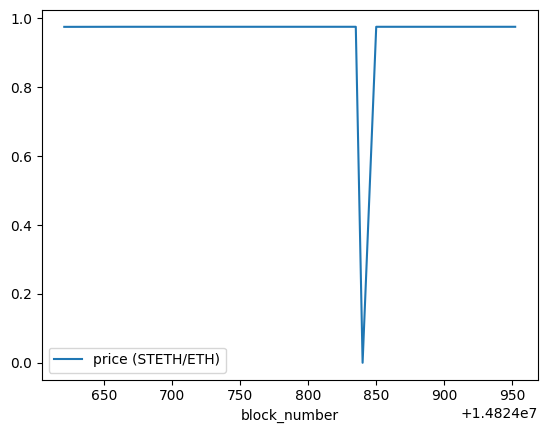

In [34]:
# are the dusting rounding issues also causing those spikes down to zero?
# look at first spike down to 0
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)].plot(x='block_number', y='price (STETH/ETH)')

In [35]:
# looks like it (see swap at block 14824840); similar rounding issues except rounded down to zero here
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
408,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x08CC4a936A24A278097FeB566Fccf71FF...,0xbefdc34be9f6d50dcf7d9692c834f2fcb750a7880a30...,14824621,0x10cf6cb3feb597dcaefdfa6fab3730491fea055a51b4...,236,204,0.975627,0x08CC4a936A24A278097FeB566Fccf71FFe84A833,0,2000000000000000000000,1,2049143953945768280377
409,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xe7a98e6b9dbdab7e4e169efbb8ba055a9f0a28da8587...,14824663,0xc07d6c8038fd4165fd07386037f0a63b56701b00e1d7...,66,60,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,0,9669640333791112375,1,9905129894611176792
410,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xebbe2cac6a8cea633f4ce13aecc6b3d402f0a53de0df...,14824714,0x090d8bfa4b34ab2e8670c488fdde86fa8c5caef4cbd4...,115,81,0.975836,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,1,4393970000000000000,0,4286080251138498473
411,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x6a1a41032f086a90520761d6444937ff73b3aea580c2...,14824787,0x2749b488383fe28bb2abeab7d111d8472e406c445803...,150,92,0.975836,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,1000730293446869257,0,976157742840268152
412,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0xf97ecc3423d91b6f51e0f384518237b4c5439490f21f...,14824795,0x9038606c713de55bd5e65ed931117811e79820115ee7...,139,77,0.975836,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,476594175496263493,1,488200580530122222
413,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xd3c3131024e6f4fb640f27a7a07513c44a4247ea663c...,14824820,0x0c7676c94dcc0bd3a33e55f1ae8bce51c723e1251f5d...,43,49,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,10000000000000000000,0,9754443750619738380
414,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0x953204aa910f21a8012789670728e410039a8f9840b6...,14824835,0xfdf144489b7e75244e22839ce1c8a398f7745a57a1c0...,397,246,0.975829,0xEda584Ac4234113e977Bd172e6393F579282b816,1,47870179539630044007,0,46694419191845003347
415,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0xb2c64c3e9722df4fbcd79662cd6746e069ae08f55242...,14824840,0xfc556897c82ced07979693ce76cd27b4565e78cb0959...,462,195,0.000000,0xEda584Ac4234113e977Bd172e6393F579282b816,1,1,0,0
416,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xc5de9e64196dff8dd176eece734d88b68e9f4e41cd1d...,14824850,0x1bc4068a1b8284a00ea135dc590d18744bf548a1c795...,84,43,0.975824,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,0,1000000000000000000,1,1024364849804104284
417,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x11CE580B7D64Fb08F73161AA95835202a...,0xe0c2a35ae160788e8d1d73a5bf465279363581af043f...,14824871,0x0f6bf5cc06980ac2ef46f0a73831494c426c0c9b3336...,394,188,0.975824,0x11CE580B7D64Fb08F73161AA95835202ae1C9417,1,381485996253488127,0,372114382696495947


In [36]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
query_swaps = query_swaps[query_swaps['tokens_bought'] > min_bought]

<AxesSubplot:xlabel='block_number'>

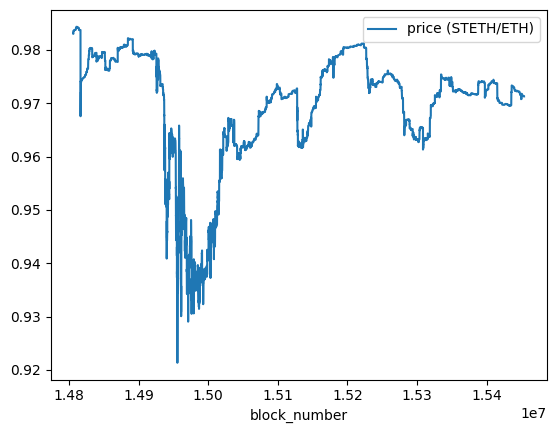

In [37]:
# nice! way better
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

In [38]:
# should smooth the price data out so not so jittery by averaging over 1h for hourly candles.
# keep the volumes numbers as well, so make some slight changes to the (tokens_bought, tokens_sold)
# columns to instead track (volume_coin0, volume_coin1) at each swap

In [39]:
# write a function that returns volume on coin indices for a swap (normalized by 1e18 for decimals)
def get_volume(coin_index: int, x: pd.Series) -> (float, float):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    volume = volume / 1e18
    return volume

In [40]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    query_swaps[key] = query_swaps.apply(lambda x: get_volume(coin_index, x), axis=1)

In [41]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xaca594c7fdb9f87a32c83fc3aa4b1fffed8056a20d80...,14805946,0x757273111a679c3ad248424d5a1586244d9ec8baf940...,197,76,0.983072,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,700000000000000000000,0,687875178355535745964,687.875178,700.000000
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xb82e4069e45e61b1de2c754cacf1ab1ccc40b17ce950...,14805949,0xb58382ff1bf4cdadce1fc8297f7a98b71ca97d66e457...,246,182,0.983020,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,10000000000000000000,0,9826273826382007791,9.826274,10.000000
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x982cc2acdb911583fbc1a02c76228da58c3eb1899cfa...,14805966,0xc0744a04ee029e9547641e928179c01c9144ce991b4c...,156,146,0.983020,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,614070000000000000,0,603401523819156548,0.603402,0.614070
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0xd02f4997b32c7d79d070ddb521505b66caf7188824f8...,14806016,0x724910de73edf4382516fd0573615bbdeb84b8a4f5a8...,215,189,0.983021,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,4350000000000000000,0,4274431391401509923,4.274431,4.350000
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0c43A4a20D2751DaFbB130024355E81df...,0x6ad094d8e7ec75a03f4be1d6a68f5552d10f20e32b66...,14806057,0x5901063081873abec82682c0da7823e576e2a001436f...,242,196,0.983021,0x0c43A4a20D2751DaFbB130024355E81dff724d3a,1,2661716510582147106,0,2615477797984023549,2.615478,2.661717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,4271237846165710434,0,4146970008556619586,4.146970,4.271238
19453,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A4...,0x1e5b61c1729e0998258f6f2cd6fb3eca1ce581690ec8...,15453320,0xdf0872c92915dc8582bb38cad33a70c94e0b52449e1b...,243,258,0.971288,0xFEf3C7aa6956D03dbad8959c59155c4A465DCacd,1,38000000000000000000,0,36894174538661211189,36.894175,38.000000
19454,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x684Ea7317b8692fBc3ba5DF5F8F7cceA0...,0xd2ad62baafc358d84bf98d552ae321a639a4f86caeff...,15453534,0x95ce49f01fbf1ced4431f398143e1e60d6289a758234...,225,153,0.971282,0x684Ea7317b8692fBc3ba5DF5F8F7cceA0608FeAf,1,433557667605135699,0,420938260856818595,0.420938,0.433558
19455,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5ea10cbf5f3583cf74cf2c3e06abe1d3e00f36e5ff32...,15453542,0x43964925c65e7a56f2d41ced6e1acda7dbc2b9394efa...,421,357,0.971282,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,0,2900000000000000000,1,2984549486416737551,2.900000,2.984549


In [42]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
query_swaps_filtered = query_swaps.filter(['block_number', 'price (STETH/ETH)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
query_swaps_filtered = query_swaps_filtered.set_index('block_number')

In [43]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(query_swaps_filtered.index.min(), query_swaps_filtered.index.max()+1)
query_swaps_filtered = query_swaps_filtered.reindex(new_index).ffill()

In [44]:
# separate data into windows of 260 blocks (~ 1h)
# remove first (last_block - first_block) % window rows so even candle windows
window = 260
first_index = (query_swaps_filtered.index[-1] - query_swaps_filtered.index[0]) % window
query_swaps_filtered = query_swaps_filtered[first_index:]

In [45]:
# smooth data using mean over 260 blocks for ~ 1h candles
s = (query_swaps_filtered.index.to_series() / window).astype(int)
query_swaps_candled = query_swaps_filtered.groupby(s).agg({'price (STETH/ETH)': ['first', 'max', 'min', 'last', 'mean'], 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
14806137              0.983021  0.983021  0.983021  0.983021  0.983021   
14806397              0.983021  0.983575  0.983021  0.983531  0.983528   
14806657              0.983531  0.983532  0.983530  0.983530  0.983531   
14806917              0.983530  0.983545  0.983530  0.983544  0.983537   
14807177              0.983544  0.983628  0.983544  0.983607  0.983583   
...                        ...       ...       ...       ...       ...   
15452757              0.971359  0.971364  0.971359  0.971364  0.971362   
15453017              0.971364  0.971364  0.971350  0.971350  0.971352   
15453277              0.971350  0.971350  0.971288  0.971288  0.971322   
15453537              0.971288  0.971288  0.971282  0.971282  0.971286   
15453797              0.971282  0.971284  0.971282  0.971284  0.971282   

              volume_coin0  volume_coin1  
                       sum           sum  
block_number                              
14806137         13.916137     14.162162  
14806397      13372.529511  13594.004819  
14806657        577.045459    586.743927  
14806917      23979.769115  24387.366945  
14807177      31196.883482  31731.104946  
...                    ...           ...  
15452757        327.123487    336.706041  
15453017       3004.501582   3094.317864  
15453277       6524.500335   6719.830485  
15453537       6649.153876   6848.263321  
15453797        522.946275    538.192750  

[2492 rows x 7 columns]

<AxesSubplot:xlabel='block_number'>

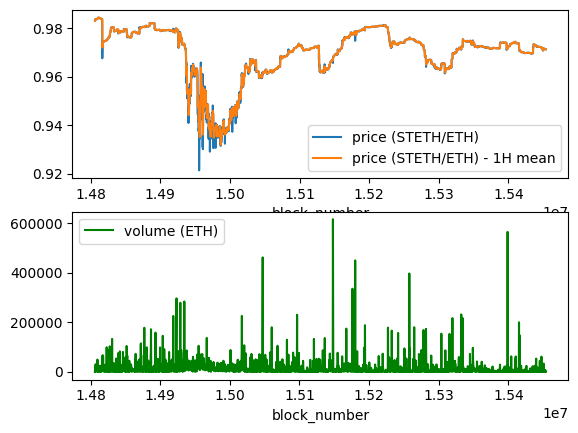

In [46]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
query_swaps.plot(x='block_number', y='price (STETH/ETH)', ax=ax[0])
query_swaps_candled['price (STETH/ETH)'].plot(y='mean', ax=ax[0], label='price (STETH/ETH) - 1H mean')
query_swaps_candled['volume_coin0'].plot(y='sum', color='g', ax=ax[1], label='volume (ETH)')

In [47]:
# plot the candles since that's dope :o

In [48]:
# get the timestamps every 24 candles (~ 24h) and interpolate the rest (SEE banteg gist again)
# NOTE: include last block in index for interp to work properly
T = 24
blocks = query_swaps_candled.index[::24].to_list() + [query_swaps_candled.index[-1]]

In [49]:
%time timestamps = [ chain.blocks[i].timestamp for i in blocks ]

CPU times: user 1.55 s, sys: 64.9 ms, total: 1.61 s
Wall time: 16.8 s


In [50]:
query_swaps_candled['timestamp'] = pd.to_datetime(np.interp(query_swaps_candled.index, blocks, timestamps) * 1e9)
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
14806137              0.983021  0.983021  0.983021  0.983021  0.983021   
14806397              0.983021  0.983575  0.983021  0.983531  0.983528   
14806657              0.983531  0.983532  0.983530  0.983530  0.983531   
14806917              0.983530  0.983545  0.983530  0.983544  0.983537   
14807177              0.983544  0.983628  0.983544  0.983607  0.983583   
...                        ...       ...       ...       ...       ...   
15452757              0.971359  0.971364  0.971359  0.971364  0.971362   
15453017              0.971364  0.971364  0.971350  0.971350  0.971352   
15453277              0.971350  0.971350  0.971288  0.971288  0.971322   
15453537              0.971288  0.971288  0.971282  0.971282  0.971286   
15453797              0.971282  0.971284  0.971282  0.971284  0.971282   

              volume_coin0  volume_coin1                     timestamp  
                       sum           sum                                
block_number                                                            
14806137         13.916137     14.162162 2022-05-19 17:09:54.000000000  
14806397      13372.529511  13594.004819 2022-05-19 18:10:33.875000064  
14806657        577.045459    586.743927 2022-05-19 19:11:13.750000128  
14806917      23979.769115  24387.366945 2022-05-19 20:11:53.624999936  
14807177      31196.883482  31731.104946 2022-05-19 21:12:33.500000000  
...                    ...           ...                           ...  
15452757        327.123487    336.706041 2022-09-01 12:04:52.578947328  
15453017       3004.501582   3094.317864 2022-09-01 13:04:38.684210432  
15453277       6524.500335   6719.830485 2022-09-01 14:04:24.789473792  
15453537       6649.153876   6848.263321 2022-09-01 15:04:10.894736640  
15453797        522.946275    538.192750 2022-09-01 16:03:57.000000000  

[2492 rows x 8 columns]

In [51]:
# put data into new df for ohlcv with 1h candles
query_swaps_ohlcv = pd.DataFrame({
    'Open': query_swaps_candled['price (STETH/ETH)']['first'],
    'High': query_swaps_candled['price (STETH/ETH)']['max'],
    'Low': query_swaps_candled['price (STETH/ETH)']['min'],
    'Close': query_swaps_candled['price (STETH/ETH)']['last'],
    'Volume': query_swaps_candled['volume_coin0']['sum'],
    'Date': query_swaps_candled['timestamp']
})
query_swaps_ohlcv = query_swaps_ohlcv.set_index('Date')
query_swaps_ohlcv

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-19 17:09:54.000000000,0.983021,0.983021,0.983021,0.983021,13.916137
2022-05-19 18:10:33.875000064,0.983021,0.983575,0.983021,0.983531,13372.529511
2022-05-19 19:11:13.750000128,0.983531,0.983532,0.983530,0.983530,577.045459
2022-05-19 20:11:53.624999936,0.983530,0.983545,0.983530,0.983544,23979.769115
2022-05-19 21:12:33.500000000,0.983544,0.983628,0.983544,0.983607,31196.883482
...,...,...,...,...,...
2022-09-01 12:04:52.578947328,0.971359,0.971364,0.971359,0.971364,327.123487
2022-09-01 13:04:38.684210432,0.971364,0.971364,0.971350,0.971350,3004.501582
2022-09-01 14:04:24.789473792,0.971350,0.971350,0.971288,0.971288,6524.500335


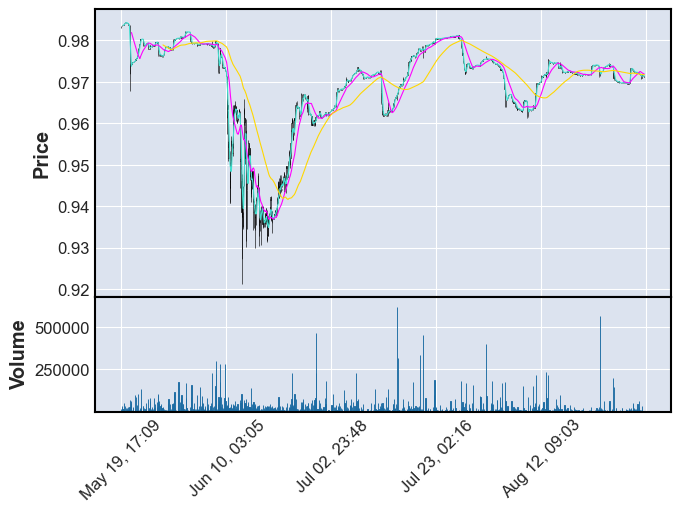

In [52]:
# oooooo fancy :)
mpf.plot(query_swaps_ohlcv, warn_too_much_data=2500, type='candle', mav=(10, 50, 200), volume=True)

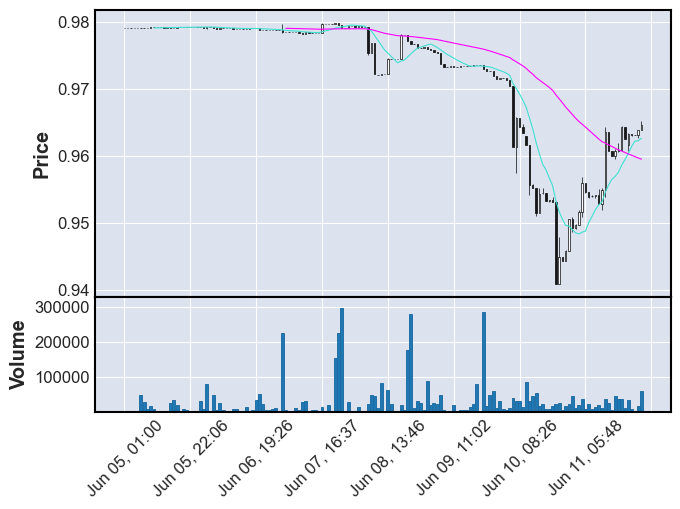

In [53]:
# look at june timeframe during liquidity crunch ...
mpf.plot(query_swaps_ohlcv[(query_swaps_ohlcv.index > '2022-06-05') & (query_swaps_ohlcv.index < '2022-06-12')], warn_too_much_data=2500, mav=(10, 50), type='candle', volume=True)

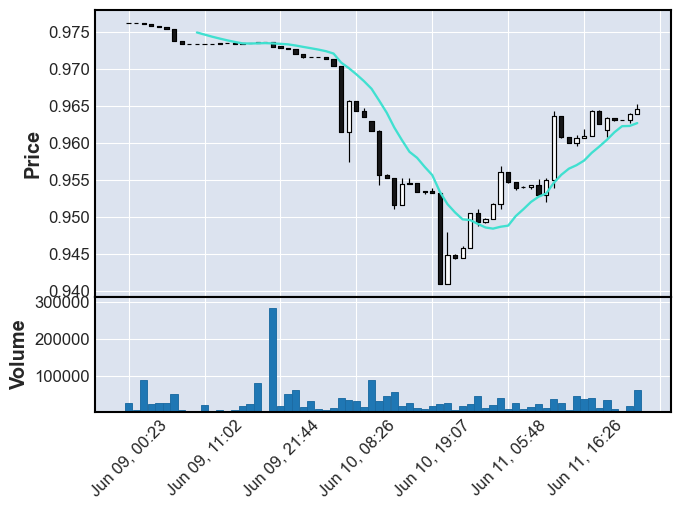

In [54]:
mpf.plot(query_swaps_ohlcv[(query_swaps_ohlcv.index > '2022-06-09') & (query_swaps_ohlcv.index < '2022-06-12')], warn_too_much_data=2500, mav=(10), type='candle', volume=True)